In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [42]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()



In [43]:
len(X_train)

60000

In [44]:
len(X_test)

10000

In [45]:
X_train[0].shape

(28, 28)

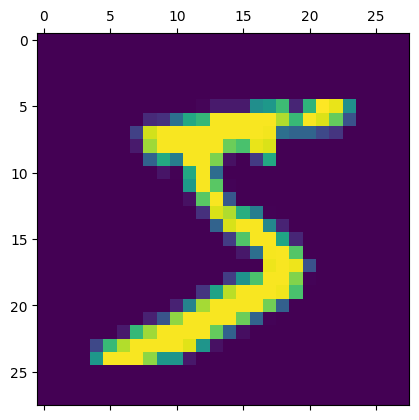

In [46]:
plt.matshow(X_train[0])
#plt.imshow(X_train[0])

In [47]:
Y_train[2]

np.uint8(4)

In [48]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [49]:
X_train.shape

(60000, 28, 28)

In [50]:
#Normalization :run this code after we train the model to get more accurate results
X_train =X_train / 255
X_test =X_test / 255

In [51]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [52]:
X_train_flattened.shape

(60000, 784)

In [53]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [54]:
model = Sequential()
model.add(Dense(10 ,input_shape=(784,),activation='sigmoid'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened,Y_train,epochs=5)



c:\Users\Acer Aspire 7\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8118 - loss: 0.7296
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9143 - loss: 0.3094
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9205 - loss: 0.2886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9202 - loss: 0.2767
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9241 - loss: 0.2654


In [55]:
model.evaluate(X_test_flattened,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9136 - loss: 0.3017


[0.26544326543807983, 0.9248999953269958]

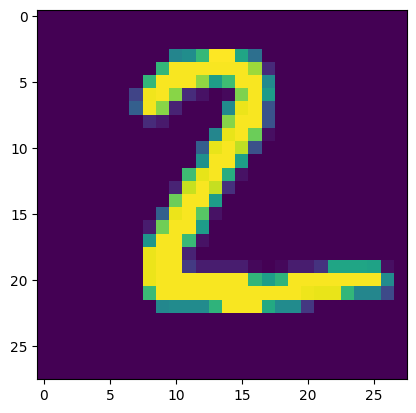

In [56]:
plt.imshow(X_test[1])

In [57]:
Y_predicted=model.predict(X_test_flattened)
#X_test_flattened[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [58]:
Y_predicted[1]
# if you want to turn confusion matrix, make sure you have a list or predicted results
Y_predicted_labels =[np.argmax(i) for i in Y_predicted]

In [59]:
np.argmax(Y_predicted[1])

np.int64(2)

In [60]:
cm= tf.math.confusion_matrix(labels=Y_test, predictions= Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    3,    3,    0,   10,    6,    2,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    9,  929,   20,    7,    4,   10,    9,   36,    5],
       [   1,    0,   18,  926,    0,   23,    2,   11,   21,    8],
       [   1,    1,    7,    2,  906,    0,   10,    4,   10,   41],
       [   7,    1,    6,   40,    7,  783,    8,    4,   30,    6],
       [   7,    3,    8,    1,    7,   22,  905,    2,    3,    0],
       [   1,    5,   24,    8,    8,    1,    0,  940,    3,   38],
       [   5,    7,    8,   26,    9,   29,    8,    9,  866,    7],
       [   9,    7,    2,   10,   22,    7,    0,   16,    8,  928]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

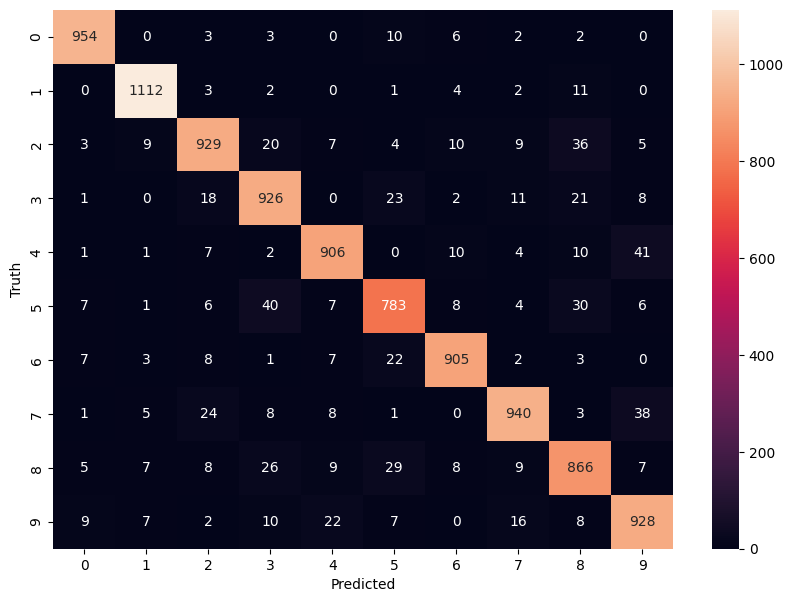

In [61]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
model = Sequential()
model.add(Dense(100 ,input_shape=(784,),activation='relu'))
model.add(Dense(10 ,activation='sigmoid'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened,Y_train,epochs=5)

c:\Users\Acer Aspire 7\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Expected `metrics` argument to be a list, tuple, or dict. Received instead: metrics=accuracy of type <class 'str'>

In [ ]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9769


[0.07734985649585724, 0.9768999814987183]

313/313 [==============================] - 0s 963us/step


Text(95.72222222222221, 0.5, 'Truth')

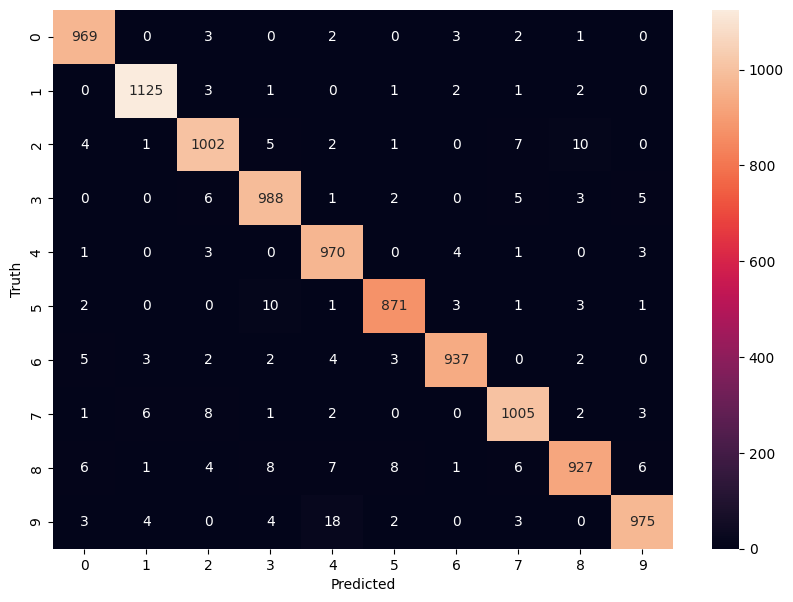

In [ ]:
Y_predicted=model.predict(X_test_flattened)
# if you want to urn confusion matrix, make sure you have a list or predicted results
Y_predicted_labels =[np.argmax(i) for i in Y_predicted]
cm= tf.math.confusion_matrix(labels=Y_test, predictions= Y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



In [ ]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(Dense(500 ,activation='relu'))
model.add(Dense(500 ,activation='relu'))
model.add(Dense(10 ,activation='sigmoid'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9044 - loss: 0.3133
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9764 - loss: 0.0760
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9833 - loss: 0.0513
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9877 - loss: 0.0387
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9900 - loss: 0.0300


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# let's make cnn model now.....
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 10)

NameError: name 'layers' is not defined